# Spark Funds Investment Strategy

Spark Funds, an asset management company wants to make investments in English speaking countries with an amount between 5 to 15 million USD per round of investment.

***

#### Business objective: 

The objective of the analysis will be to identify the best sectors, countries, and a suitable funding type to have insights for Spark Funds to make investments. The overall strategy for Spark Funds is to find out and invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

The Goal of the Analysis is to identify the suitable investment funding type in the top 3 main sectors in each of the top 3 English speaking countries based on the dataset provided (Sourced from crunchbase.com)

#### Importing the Libraries

In [1]:
# All libraries are imported in this cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime 
import pytz
warnings.filterwarnings('ignore')
from pprint import pprint 
%matplotlib inline

#### Importing the datasets
***
- Using encoding to handle special characters

In [2]:
companies = pd.read_csv('companies.csv',encoding='ISO-8859-1')
rounds2 = pd.read_csv('rounds2.csv',encoding='ISO-8859-1')
mappings = pd.read_csv('mapping.csv',encoding='ISO-8859-1')

#### Understanding the Data

1. **companies**  - The dataset consists of list companies with thier details such name, website, country and sector in which they opeate

In [3]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


2. **rounds2** - The dataset contains the details such as name, funding type and the amount raised in USD. 

In [4]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


3. **mappings** - The mapping dataset contains the mapping of various sub-sectors to main_sectors.

In [5]:
mappings.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


## Checkpoint 1: Data Cleaning

Cleaning up the datasets & Finding the Nulls to remove the skewing of the results if required

In [6]:
# Find out the percentage of nulls in companies dataset
100* (companies.isnull().sum()/len(companies))

permalink         0.000000
name              0.001507
homepage_url      7.621143
category_list     4.743250
status            0.000000
country_code     10.483968
state_code       12.878194
region           12.099204
city             12.096191
founded_at       22.934245
dtype: float64

Since we will be filtering out the records for top 3 countries, The null values of country_code in the dataset will do no harm

In [7]:
100*(rounds2.isnull().sum() /len(rounds2) )

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64

In [8]:
rounds2.raised_amount_usd.describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

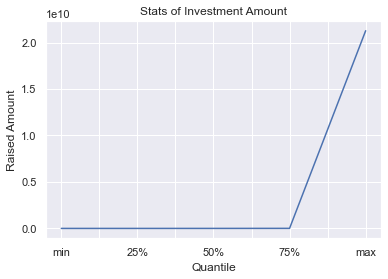

In [9]:
# Plot to show the range of values of Raised Amount and why median is better parameter to pick
sns.set_theme(style="darkgrid")
rounds2.raised_amount_usd.describe()[3:8].plot()
plt.title('Stats of Investment Amount')
plt.xlabel('Quantile')
plt.ylabel('Raised Amount')
plt.show()

Since the spread of the variable 'raised_amount_usd' is very large, we will be picking `median` as **representative value** to ignore nulls and outliers, The 17% missing values will not skew the count as the median value remained unchanged when analysed seprately with or without null value of field 'raised_amount_usd' for each type 'funding_round_type'

#### Table 1.1: 
- Points and Results

1. Number of unique companies present in rounds2 dataset
2. Number of unique companies are present in companies dataset
-  Answer - _**In the companies and rounds2 dataset, The column `permalink` can be used as the unique key for each company as there are no missing values for the dataset and is present on both the datasets.**_

In [10]:
rounds2.head()
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [11]:
companies.head()
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

- Next we will find out the Unique number of companies `companies` and  `rounds2` dataset

In [12]:
# Split the permalink on / and expand the list into each element & converting the Series into df with cname as field name
compname = pd.DataFrame(rounds2['company_permalink'].str.split('/', expand=True)[2]).rename(columns = {2: 'cname'}) 
    # Converting the case for all values in the UPPER case and pushing the field into rounds2 dataframe
compname =  compname.apply(lambda x: x.str.upper())
compname = pd.DataFrame(compname['cname'].str.lstrip('-'))
rounds2['cname'] = compname['cname']
rounds2.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,cname
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,FAME
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,QOUNTER


In [13]:
# Same process can be opted for companies dataset
compname = pd.DataFrame(companies['permalink'].str.split('/', expand=True)[2]).rename(columns = {2: 'cname'}) 
compname =  compname.apply(lambda x: x.str.upper())
compname = pd.DataFrame(compname['cname'].str.lstrip('-'))
companies['cname'] = compname['cname']
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,cname
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,FAME
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,QOUNTER


In [14]:
# Checking the cname field to find out the unique values
print('The Number of Unique companies in the rounds2 dataset are - ' , len(pd.DataFrame(rounds2['cname'].unique())))
print('The Number of Unique companies in the companies dataset are  - ' , len(pd.DataFrame(companies['cname'].unique())))

The Number of Unique companies in the rounds2 dataset are -  66370
The Number of Unique companies in the companies dataset are  -  66368


4. The list companies in the rounds2 file which are not present in companies.

In [15]:
df_diff = pd.concat([rounds2,companies], join="inner",axis=0).drop_duplicates(keep=False)
print('Following is the list of company names in rounds2 dataset which are not present in companies dataset')
df_diff

Following is the list of company names in rounds2 dataset which are not present in companies dataset


,cname
29597,E-CÃBICA
31863,ENERGYSTONE-GAMES-ÇΜÇ³Æ¸¸Æ
45176,HUIZUCHE-COM-Æ Ç§ŸÈ½¦
58473,MAGNET-TECH-Ç£Ç³Ç§Æ
101036,TIPCAT-INTERACTIVE-Æ²ÈŸÄ¿¡Æ¯Ç§Æ
109969,WEICHE-TECH-ÅÈ½¦Ç§Æ
113839,ZENGAME-Ç¦ Æ¸¸Ç§Æ
16827,E-CÃBICA
18197,ENERGYSTONE-GAMES-ÇΜÇŸ³Æ¸¸Æ
26139,HUIZUCHE-COM-Æ Ç§È½¦


5. Merging of companies and rounds2 as master_frame 
6. Number of observations present in master_frame

In [16]:
master_frame = pd.merge(companies, rounds2, on=['cname'], how='outer')
print('The number of observation in master_frame after merging companies into rounds2 dataframe are - ',len(master_frame.cname))

The number of observation in master_frame after merging companies into rounds2 dataframe are -  114954


In [17]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,cname,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,FAME,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,QOUNTER,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,QOUNTER,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,THE-ONE-OF-THEM-INC-,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,0-6-COM,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


***
## Checkpoint 2: Funding Type Analysis

***
**Find out the Investment type out of 'Seed', 'Angel', 'Venture' and 'Private_Equity' for Spark Funds to invest wants based on the Investment amount of 5 to 15 million USD**

1. Given the very large range (few thousands to Billions) of the numeric field, the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) would be median

In [18]:
# Median value for each 
print('The Representative value i.e. median for Seed, Angel, Venture and PE are \n')

print('Seed           =',master_frame[master_frame.funding_round_type == 'seed'].median()[0])
print('Angel          =',master_frame[master_frame.funding_round_type == 'angel'].median()[0])
print('Venture        =',master_frame[master_frame.funding_round_type == 'venture'].median()[0])
print('Private Equity =',master_frame[master_frame.funding_round_type == 'private_equity'].median()[0])

The Representative value i.e. median for Seed, Angel, Venture and PE are 

Seed           = 275000.0
Angel          = 400000.0
Venture        = 5000000.0
Private Equity = 20000000.0


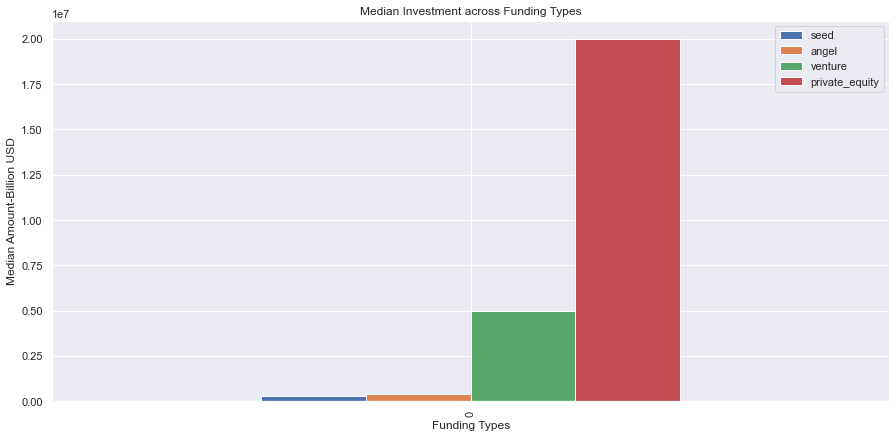

In [19]:
# Lets try to visualize the range to see the difference
ft = pd.DataFrame([])
ft['seed'] = [master_frame[master_frame.funding_round_type == 'seed'].median()[0]]
ft['angel'] = [master_frame[master_frame.funding_round_type == 'angel'].median()[0]]
ft['venture'] = [master_frame[master_frame.funding_round_type == 'venture'].median()[0]]
ft['private_equity'] = [master_frame[master_frame.funding_round_type == 'private_equity'].median()[0]]
ft.plot.bar(figsize=[15,7])
plt.title('Median Investment across Funding Types')
plt.xlabel('Funding Types')
plt.ylabel('Median Amount-Billion USD')
plt.show()

Given Spark Funds wants to invest between 5 to 15 million USD,the category of funding type moste suitable is <font color=blue> Venture </font> with the median value of raised amount equal to 5 million.

## Checkpoint 3: Country Analysis

***
Narrowing down the English speaking countries with the highest amount of funding for the Venture investment type where Spark Funds wants to invest in . A broader strategy to invest where most investments are occurring.

As required, For `Venture` investment type, We will create a data frame named top9 with the top nine countries receiving highest
total investments 

In [20]:
df = master_frame.loc[master_frame.funding_round_type == 'venture']
top9 = df.groupby('country_code').sum().sort_values(['raised_amount_usd'],ascending=False)[:10]

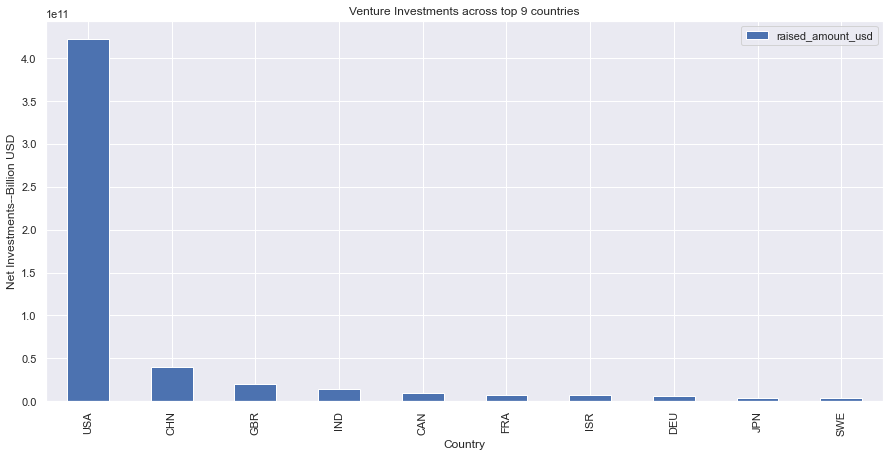

In [21]:
# Lets visualize the results in a bar plot 
top9.plot.bar(figsize=[15,7])
plt.title('Venture Investments across top 9 countries')
plt.xlabel('Country')
plt.ylabel('Net Investments--Billion USD')
plt.show()

As per the Link provided https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language, Following are the top3 English speaking countries based on the amount raised for funding type - `Venture`
1. USA 
2. GBR
3. IND

In [22]:
# Filtering the top9 further to only include the top 3 English speaking country
top3 = df.loc[df.country_code.isin(['USA','GBR','IND'])].reset_index(drop=True)
top3.country_code.unique()

array(['IND', 'USA', 'GBR'], dtype=object)

## Checkpoint 4: Sector Analysis 1
***

We will extract the primary sector of each category list from the category_list column based on the Business Rule that the first string before the vertical bar will be considered the primary sector.

The mapping file 'mapping.csv' will be used to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)
***
- The category_list will splitted and expanded to select the Primary sector based on Business Rule. Rename category_list field temporarily

In [23]:
top3 = top3.rename(columns={'category_list':'comb_cat_list'})
top3_temp = pd.DataFrame(top3['comb_cat_list'].str.split('|',expand=True)[0]).rename(columns ={0:'category_list'}).reset_index(drop=True)
top3_temp
top3['category_list'] = top3_temp['category_list']
top3

,permalink,name,homepage_url,comb_cat_list,status,country_code,state_code,region,city,founded_at,cname,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,category_list
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,FAME,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,QOUNTER,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,Application Platforms
2,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-TECHNOLOGIES,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,Software
3,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,0XDATA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics
4,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,0XDATA,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,Analytics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41662,/Organization/Zyomyx-Inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,ZYOMYX-INC,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0,Biotechnology
41663,/Organization/Zyomyx-Inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,ZYOMYX-INC,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,Biotechnology
41664,/Organization/Zyomyx-Inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,ZYOMYX-INC,/ORGANIZATION/ZYOMYX-INC,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0,Biotechnology
41665,/Organization/Zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,ZYRRA,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,E-Commerce


- Metling the mappings dataset to explode it horizontally

In [24]:
mappings.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


- Exploding the mappings dataset horizontally using melt function of pandas

In [25]:
melted =  pd.melt(mappings,id_vars=['category_list'],var_name='main_sector',value_name='belongs')
melted.head()

,category_list,main_sector,belongs
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0


- Filtering the melted dataset to only select the mapping between Category & main sector where `belongs` value is 1


In [26]:
melted = melted.loc[melted.belongs == 1].reset_index(drop=True)
melted.head(5)

,category_list,main_sector,belongs
0,Adventure Travel,Automotive & Sports,1
1,Aerospace,Automotive & Sports,1
2,Auto,Automotive & Sports,1
3,Automated Kiosk,Automotive & Sports,1
4,Automotive,Automotive & Sports,1


- Merging the dataframe filtered for top 3 countries for funding type Venture with exploded mappings dataset

In [27]:
top3m = pd.merge(top3, melted, on=['category_list'], how='inner')
top3m.drop('belongs',inplace=True,axis=1)
top3m.head()

,permalink,name,homepage_url,comb_cat_list,status,country_code,state_code,region,city,founded_at,cname,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,category_list,main_sector
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,FAME,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
1,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,90MIN,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment
2,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,90MIN,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment
3,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,90MIN,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Entertainment
4,/Organization/All-Def-Digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,ALL-DEF-DIGITAL,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment


***
## Checkpoint 5: Sector Analysis 2

- Next, We will be find out the most heavily invested main sectors in each of the three countries (for funding type `Venture` and investments range of 5-15 M USD).

- Three separate data frames D1, D2 and D3 will be created for each of the three countries containing the observations of funding type Venture falling within the 5-15 million USD range. 

In [28]:
# top3m is the filtered dataset for funding type Venture with primary sector mapped to main sector from mappings dataset
D1 = top3m[(top3m.country_code == 'USA') & (top3m.raised_amount_usd >= 5000000) & (top3m.raised_amount_usd <= 20000000)]
D2 = top3m[(top3m.country_code == 'GBR') & (top3m.raised_amount_usd >= 5000000) & (top3m.raised_amount_usd <= 20000000)]
D3 = top3m[(top3m.country_code == 'IND') & (top3m.raised_amount_usd >= 5000000) & (top3m.raised_amount_usd <= 20000000)]

In [29]:
D1.groupby(['country_code','main_sector']).raised_amount_usd.agg(['count','sum']).sort_values('count',ascending=False).reset_index()

,country_code,main_sector,count,sum
0,USA,Others,3335,3.349621e+10
1,USA,Cleantech / Semiconductors,2845,3.110918e+10
2,USA,"Social, Finance, Analytics, Advertising",2199,2.192932e+10
3,USA,"News, Search and Messaging",1767,1.753160e+10
4,USA,Health,1104,1.173732e+10
5,USA,Manufacturing,969,1.028869e+10
6,USA,Entertainment,674,6.704700e+09
7,USA,Automotive & Sports,187,1.831076e+09
8,USA,Blanks,104,1.093773e+09


In [30]:
D2.groupby(['country_code','main_sector']).raised_amount_usd.agg(['count','sum']).sort_values('count',ascending=False).reset_index()

,country_code,main_sector,count,sum
0,GBR,Others,167,1.665625e+09
1,GBR,Cleantech / Semiconductors,150,1.538808e+09
2,GBR,"Social, Finance, Analytics, Advertising",112,1.062882e+09
3,GBR,"News, Search and Messaging",87,8.609802e+08
4,GBR,Entertainment,64,6.357401e+08
5,GBR,Manufacturing,49,4.771657e+08
6,GBR,Health,29,3.021275e+08
7,GBR,Automotive & Sports,18,2.015516e+08
8,GBR,Blanks,8,7.776485e+07


In [31]:
D3.groupby(['country_code','main_sector']).raised_amount_usd.agg(['count','sum']).sort_values('count',ascending=False).reset_index()

,country_code,main_sector,count,sum
0,IND,Others,125,1.302550e+09
1,IND,"News, Search and Messaging",61,5.919345e+08
2,IND,Entertainment,38,3.718300e+08
3,IND,"Social, Finance, Analytics, Advertising",35,3.425435e+08
4,IND,Manufacturing,30,3.545000e+08
5,IND,Cleantech / Semiconductors,23,2.171800e+08
6,IND,Health,22,2.237400e+08
7,IND,Automotive & Sports,17,2.129000e+08
8,IND,Blanks,2,2.700000e+07


- Counting the number of investment in each country and subsequently the top main sectors to invest in 

***
### Table 5.1 Data

- Count of Investments for each of the country 

In [32]:
D1.raised_amount_usd.count() # USA
D2.raised_amount_usd.count() # GBR
D3.raised_amount_usd.count() # IND
print('USA : ', D1.raised_amount_usd.count())
print('GBR : ', D2.raised_amount_usd.count())
print('IND : ', D3.raised_amount_usd.count())

USA :  13184
GBR :  684
IND :  353



- Total Investments recieved for each Country 

In [33]:
D1.raised_amount_usd.sum()
D2.raised_amount_usd.sum()
D3.raised_amount_usd.sum()
print('USA : ', D1.raised_amount_usd.sum())
print('GBR : ', D2.raised_amount_usd.sum())
print('IND : ', D3.raised_amount_usd.sum())

USA :  135721862959.0
GBR :  6822644700.0
IND :  3644177552.0


- The Sectors with highest number of investments count for each the Country 

1. USA
>a. Others = 3335 <br>
>b. Cleantech / Semiconductors = 2845 <br>
>c. Social, Finance, Analytics, Advertising = 2199 <br>

2. GBR
>a. Others = 167 <br>
>b. Cleantech / Semiconductors = 150 <br>
>c. Social, Finance, Analytics, Advertising = 112 <br>
2. IND
>a. Others = 125 <br>
>b. News, Search and Messaging = 61 <br>
>c. Entertainment = 38 <br>

In [34]:
print('Company with highest raised amount in the Top Sector - "Others" for USA ')
D1.loc[D1.main_sector == 'Others'].groupby('cname').sum().sort_values(['raised_amount_usd'],ascending=False)[:1]

Company with highest raised amount in the Top Sector - "Others" for USA 


,raised_amount_usd
cname,
EXAGRID-SYSTEMS,77717024.0


In [35]:
print('Company with highest raised amount in the Top Sector - "Others" for GBR ')
D2[D2.main_sector == 'Others'].groupby('cname').sum().sort_values(['raised_amount_usd'],ascending=False)[:1]

Company with highest raised amount in the Top Sector - "Others" for GBR 


,raised_amount_usd
cname,
PICOCHIP,64000000.0


In [36]:
print('Company with highest raised amount in the Top Sector - "Others" for IND ')
D3[D3.main_sector == 'Others'].groupby('cname').sum().sort_values(['raised_amount_usd'],ascending=False)[:1]

Company with highest raised amount in the Top Sector - "Others" for IND 


,raised_amount_usd
cname,
FIRSTCRY-COM,39000000.0


In [37]:
print('Company with highest raised amount in the Second Best Sector - "Cleantech / Semiconductors" for USA ')
D1[D1.main_sector == 'Cleantech / Semiconductors'].groupby('cname').sum().sort_values(['raised_amount_usd'],ascending=False)[:1]

Company with highest raised amount in the Second Best Sector - "Cleantech / Semiconductors" for USA 


,raised_amount_usd
cname,
GAINSPAN,113188900.0


In [38]:
print('Company with highest raised amount in the Second Best Sector - "Cleantech / Semiconductors" for GBR ')
D2[D2.main_sector == 'Cleantech / Semiconductors'].groupby('cname').sum().sort_values(['raised_amount_usd'],ascending=False)[:1]

Company with highest raised amount in the Second Best Sector - "Cleantech / Semiconductors" for GBR 


,raised_amount_usd
cname,
EUSA-PHARMA,54200000.0


In [39]:
print('Company with highest raised amount in the Second Best Sector - "News, Search and Messaging" for IND ')
D3[D3.main_sector == 'News, Search and Messaging'].groupby('cname').sum().sort_values(['raised_amount_usd'],ascending=False)[:1]

Company with highest raised amount in the Second Best Sector - "News, Search and Messaging" for IND 


,raised_amount_usd
cname,
GUPSHUP-TECHNOLOGY-INDIA-PVT-LTD,33000000.0


***
## Checkpoint 6: Plots

1. Plot showing the Median amount of investment in each funding type. It should make it clear that a Venture funding type is best suited for Spark Funds.   

In [40]:
# Filtering the master_frame for four funding type - Seed, Angel, Venture and PE 
df = master_frame[master_frame.funding_round_type.isin(['seed','angel','venture','private_equity'])]
df.funding_round_type.unique()

array(['venture', 'seed', 'private_equity', 'angel'], dtype=object)

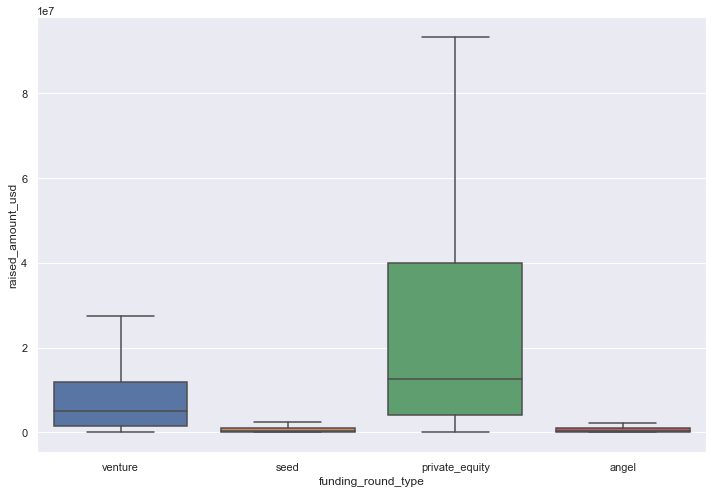

In [41]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.boxplot(x='funding_round_type',y='raised_amount_usd',data=df[(df.raised_amount_usd <= 100000000)],showfliers = False,ax=ax)
plt.show()

- Clearly 75% of the Investments in **`Venture`** are upto 15 million USD while for Private Equity, Although median is at around 20 million the range is is very high and reaching up to 100 million when the outliers are excluded. 
- Thus Venture is the most suitable Funding type for Spark Funds given that the Amount company wants to spend is between 5 million to 15 million USD

***

2.  The Plot showing the top 9 countries against the total amount of investments of funding type `Venture` . This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

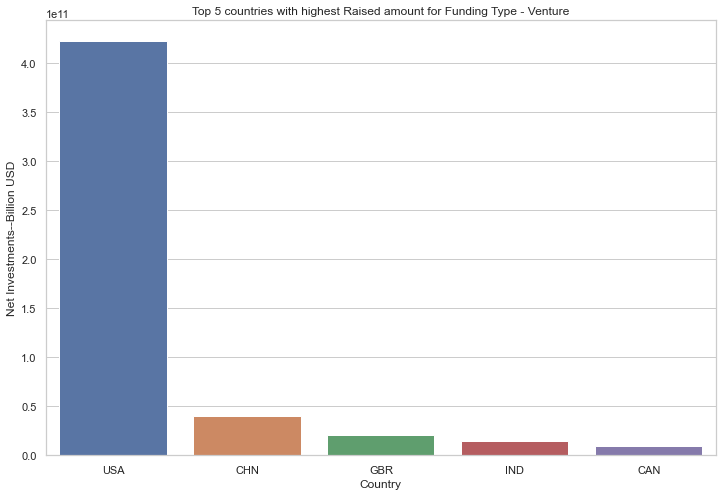

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_theme(style="darkgrid")
df = master_frame.loc[(master_frame.funding_round_type == 'venture')]
df = df.groupby('country_code').sum().sort_values(['raised_amount_usd'],ascending=False).reset_index()[:5]
sns.barplot(x=df.country_code, y=df.raised_amount_usd, data=df)
plt.xlabel('Country')
plt.ylabel('Net Investments--Billion USD')
plt.title('Top 5 countries with highest Raised amount for Funding Type - Venture')
plt.show()

- USA, CHN, GBR, IND and CAN are the top countries with the highest raised amount USD for funding type Venture. Out of these since CHN is not an English speaking country, We have the list of **USA, GBR and IND** as the top 3 country to invest in. 

<br>
3. The plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart for Venture investment type. This plot should clearly display the top 3 sectors each in USA, GBR, and IND.


In [43]:
# We will use the top3m dataframe created above after merging of mappings dataset
# Now that we are only interested in the Investment Range between 5 and 20 million Dollars, We will filter our dataset accordingly

df = top3m.loc[(master_frame.funding_round_type == 'venture') & (top3m.raised_amount_usd >= 5000000) & (top3m.raised_amount_usd <= 20000000)].reset_index(drop=True)
df.head()

,permalink,name,homepage_url,comb_cat_list,status,country_code,state_code,region,city,founded_at,cname,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,category_list,main_sector
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,FAME,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
1,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,90MIN,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment
2,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,90MIN,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Entertainment
3,/Organization/All-Def-Digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,ALL-DEF-DIGITAL,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment
4,/Organization/Newscorporation,News Corp,http://www.newscorp.com,Media|News|Publishing,ipo,USA,NY,New York City,New York,01-01-2013,NEWSCORPORATION,/organization/newscorporation,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,NaN,08-01-2010,12500000.0,Media,Entertainment


In [44]:
# Grouping the filtered dataset by country code and Main Sector with aggregation methods applied 
df = df.groupby(['country_code','main_sector']).raised_amount_usd.agg(['count','sum']).reset_index()
df.head()

,country_code,main_sector,count,sum
0,GBR,Automotive & Sports,10,118897030.0
1,GBR,Blanks,3,26655679.0
2,GBR,Cleantech / Semiconductors,68,757968992.0
3,GBR,Entertainment,30,292953877.0
4,GBR,Health,15,163362118.0


- Below Plot shows all three countries with count of investment on same chart with each sector representing different hue
<br> Although, The above Plot is very much skewed by values of USA country code, We will try to create plot of each of the country seperately to clearly show the sectors with highest count of investments 

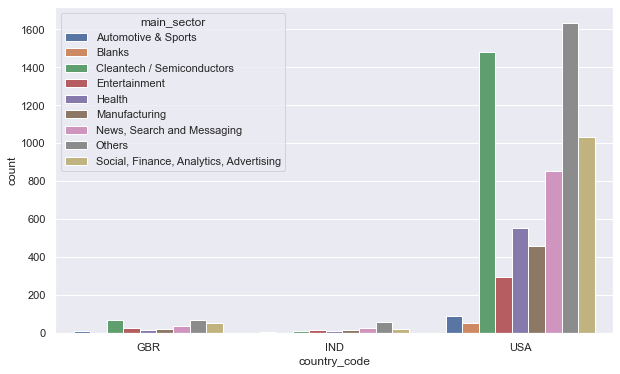

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.barplot(x=df.country_code, y='count', hue=df.main_sector, data=df, estimator= lambda x: np.quantile(x, 0.5))
plt.show()

In [46]:
# Seperate dataframes for each country code with aggregated values of count and sum after grouping by Country and Sector
# Each dataframe is sorted in descending order of count and only contains the top3 entries.

USA = D1.groupby(['country_code','main_sector']).raised_amount_usd.agg(['count','sum']).sort_values('count',ascending=False).reset_index()[:3]
GBR = D2.groupby(['country_code','main_sector']).raised_amount_usd.agg(['count','sum']).sort_values('count',ascending=False).reset_index()[:3]
IND = D3.groupby(['country_code','main_sector']).raised_amount_usd.agg(['count','sum']).sort_values('count',ascending=False).reset_index()[:3]

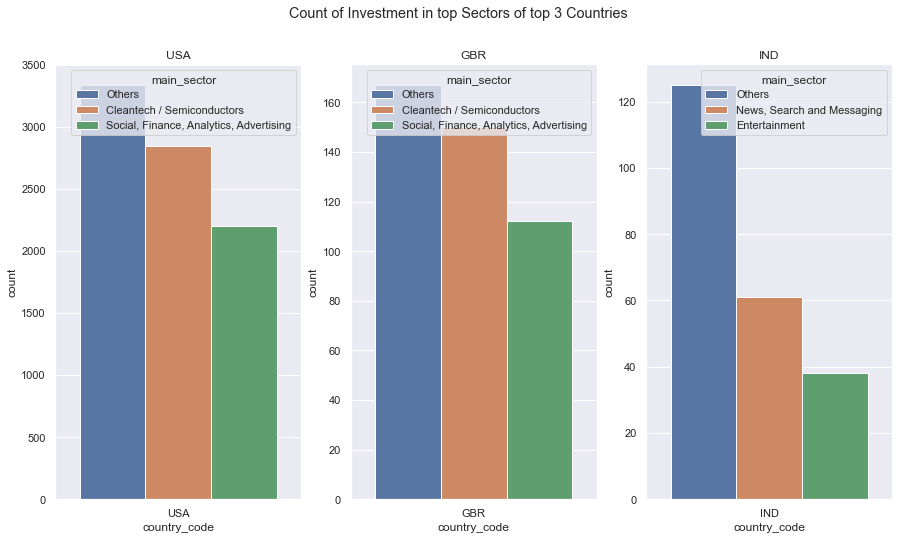

In [47]:
# Plotting subplot for each country using sns 

fig, ax = plt.subplots(1,3,figsize=(15, 8))
sns.set_theme(style="darkgrid")
fig.suptitle('Count of Investment in top Sectors of top 3 Countries ')
ax[0].set_title('USA')
ax[1].set_title('GBR')
ax[2].set_title('IND')
sns.barplot(ax=ax[0], x=USA.country_code, y=USA['count'], hue=USA.main_sector, data=USA, estimator= lambda x: np.quantile(x, 0.5))
sns.barplot(ax=ax[1], x=GBR.country_code, y=GBR['count'], hue=GBR.main_sector, data=GBR, estimator= lambda x: np.quantile(x, 0.5))
sns.barplot(ax=ax[2], x=IND.country_code, y=IND['count'], hue=IND.main_sector, data=IND, estimator= lambda x: np.quantile(x, 0.5))
plt.show()

***
- There is another way of clearing providing broader picture of how each sector is performing with a country. This dataset can also be filtered to only have top 3 entries but it is not done that way to avoid redundancy  

In [48]:
# Again creating seperate dataframe for each country with grouping sector and country code followed by sorting 
# The top3m dataframe is used again which was created above after merging master_frame with melted mappings dataset

df = top3m.loc[(master_frame.funding_round_type == 'venture') & (top3m.raised_amount_usd >= 5000000) & (top3m.raised_amount_usd <= 20000000)].reset_index(drop=True)
usa = D1.groupby(['country_code','main_sector']).raised_amount_usd.agg(['count','sum']).sort_values('count',ascending=False)
gbr = D2.groupby(['country_code','main_sector']).raised_amount_usd.agg(['count','sum']).sort_values('count',ascending=False)
ind = D3.groupby(['country_code','main_sector']).raised_amount_usd.agg(['count','sum']).sort_values('count',ascending=False)

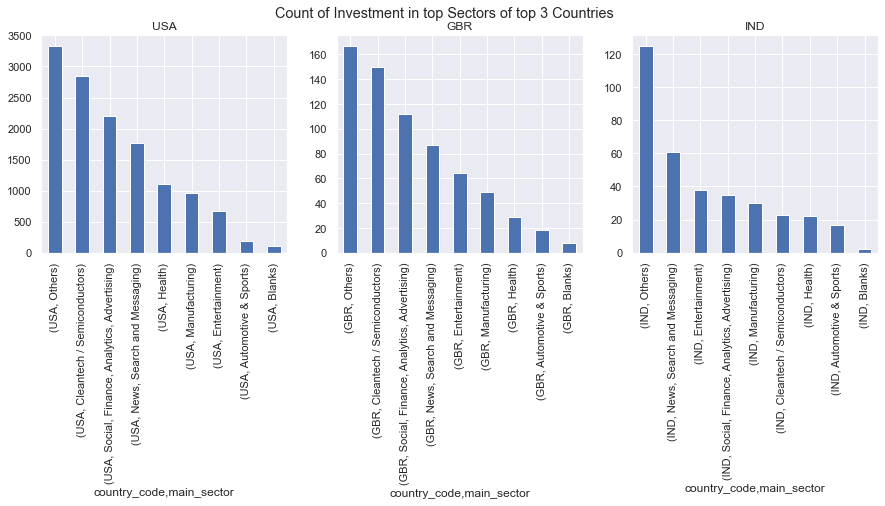

In [51]:
# Plotting subplot for each country using using matplotlib 

fig, ax = plt.subplots(1,3,figsize=(15, 4))
sns.set_theme(style="darkgrid")
fig.suptitle('Count of Investment in top Sectors of top 3 Countries ')
ax[0].set_title('USA')
ax[1].set_title('GBR')
ax[2].set_title('IND')
usa['count'].plot.bar(ax=ax[0])
gbr['count'].plot.bar(ax=ax[1])
ind['count'].plot.bar(ax=ax[2])
plt.show()

**Signature**

<br>
Abhishek Singh <br>
Date - 27 April 2021 <br>

***

# End of Project